In [26]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#set seed
np.random.seed(42)

#daftar metode pembayaran
payment_method = ['card', 'transfer', 'e-wallet', 'cash', 'QR code']

#jumlah data
n = 1000

#generate DataFrame
data = pd.DataFrame({
    'payment_method': np.random.choice(payment_methods, size=n),
    'transaction_amount': np.random.normal(1000000, 450000, size=n),  
    'transaction_time': np.random.randint(0, 24, size=n),  
    'day_of_week': np.random.choice(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], size=n),
    'is_successful': np.random.choice([1, 0], size=n, p=[0.95, 0.05]), 
    'user_age': np.random.randint(18, 60, size=n),  
    'device_type': np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=n),
    'location': np.random.choice(['Bandung', 'Jakarta', 'Semarang'], size=n),
    'payment_channel': np.random.choice(['app', 'website', 'in-store'], size=n),
    'payment_duration': np.random.normal(2, 0.5, size=n)  
})
data.head()

,payment_method,transaction_amount,transaction_time,day_of_week,is_successful,user_age,device_type,location,payment_channel,payment_duration
0,Bank Transfer,1.153790e+06,7,Minggu,1,49,Tablet,Semarang,app,2.399903
1,Cash on Delivery,1.844277e+06,16,Kamis,1,21,Desktop,Semarang,in-store,1.150291
2,Credit Card,1.427691e+06,14,Rabu,0,35,Mobile,Bandung,website,1.889792
3,Bank Transfer,7.403934e+05,16,Senin,1,22,Desktop,Bandung,in-store,1.460402
4,Bank Transfer,5.957134e+05,22,Kamis,1,37,Desktop,Jakarta,app,3.081550


Statistik Deskriptif:
       transaction_amount  transaction_time  is_successful     user_age  \
count        1.000000e+03       1000.000000    1000.000000  1000.000000   
mean         1.018075e+06         11.773000       0.967000    38.625000   
std          4.505816e+05          6.973098       0.178726    11.919499   
min         -3.033149e+05          0.000000       0.000000    18.000000   
25%          7.187479e+05          6.000000       1.000000    29.000000   
50%          1.016485e+06         12.000000       1.000000    39.000000   
75%          1.306719e+06         18.000000       1.000000    48.250000   
max          2.385496e+06         23.000000       1.000000    59.000000   

       payment_duration  
count       1000.000000  
mean           2.012194  
std            0.495210  
min            0.467772  
25%            1.667722  
50%            2.014167  
75%            2.355811  
max            3.799733  

Distribusi Metode Pembayaran:
payment_method
Cash on Delivery    28

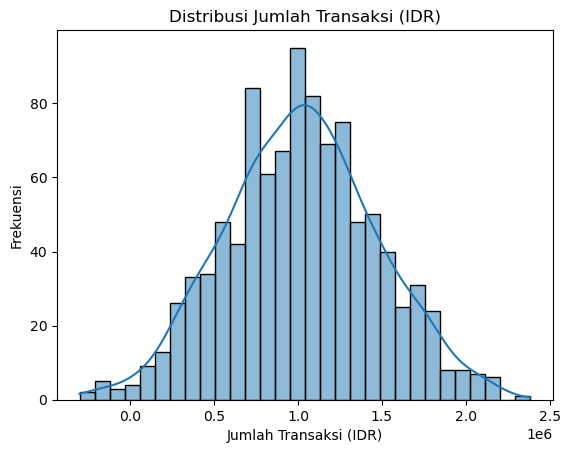

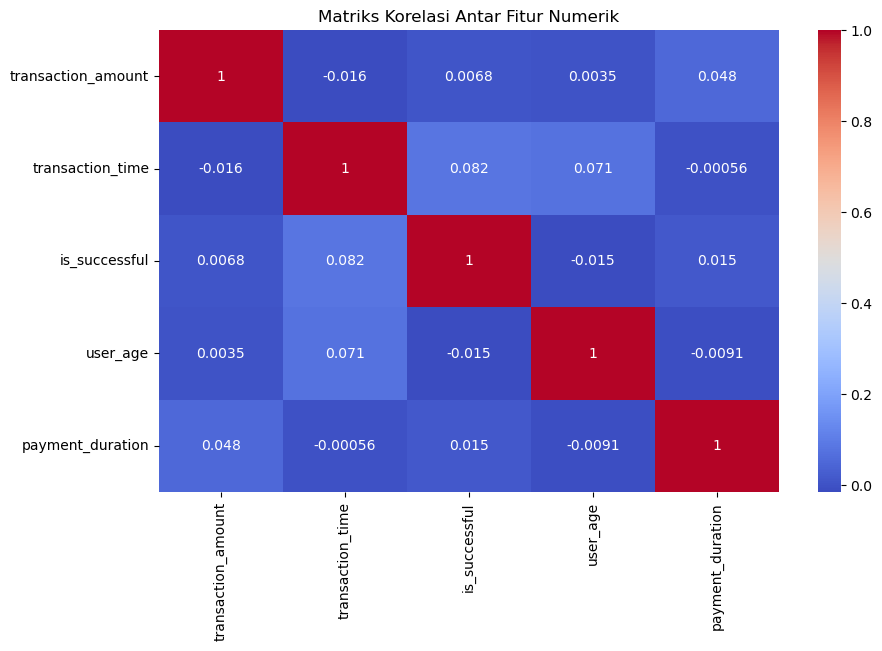

In [28]:
# Statistik numerik
print("Statistik Deskriptif:")
print(data.describe())

# Distribusi metode pembayaran
print("\nDistribusi Metode Pembayaran:")
print(data['payment_method'].value_counts())

# Distribusi jumlah transaksi
sns.histplot(data['transaction_amount'], bins=30, kde=True)
plt.title("Distribusi Jumlah Transaksi (IDR)")
plt.xlabel("Jumlah Transaksi (IDR)")
plt.ylabel("Frekuensi")
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode kolom kategorikal
label_encoders = {}
for col in ['payment_method', 'device_type', 'location', 'payment_channel', 'day_of_week']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Simpan dataset
data.to_csv('dataset_pembayaran.csv', index=False)